## Problem Statement:

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

Explore the dataset and extract insights using Exploratory Data Analysis.

i) Do the users spend more time on the new landing page than the old landing page?

ii) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

iii) Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

iv) Is the mean time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

## Data Dictionary

The provided datasets contains the following columns:

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

### Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy import stats

### Reading the data into a dataframe 

In [5]:
df = pd.read_csv('abtest.csv') 
# first five rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [3]:
# shape of the dataset
df.shape

(100, 6)

 **Observations**
    
*The dataset contains 100 rows and 6 columns

In [8]:
# information about the columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations**

* The Group, Landing_page, Converted and Language_preferred columns are categorical. 

* While User_id and Time_spent_on_the_page are numerical.



In [61]:
# group column should be converted to categorical data type
# categorical column should be converted to categorical type 
# (It reduces the data space required to store the dataframe, 
# every class in the categorical column will be represented by a number under the hood.
# This is useful during model building)

df['group'] = df.group.astype('category')
df['landing_page'] = df.landing_page.astype('category')
df['converted'] = df.converted.astype('category')
df['language_preferred'] = df.language_preferred.astype('category')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


**Check the count of each unique category in each of the categorical variables.**

In [62]:
#Making a list of all catrgorical variables 
cat_col=['group','landing_page','converted','language_preferred']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*50)

control      50
treatment    50
Name: group, dtype: int64
--------------------------------------------------
new    50
old    50
Name: landing_page, dtype: int64
--------------------------------------------------
yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------
French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------


Categorical variables converted to int. data type

In [18]:
# summary of the data
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**observations**

* The data contains information about 100 users
* The average time spent on the page is 5.37mins

**By default the describe() function shows only the summary of numeric variables.The summary of non-numeric variables are;**  

In [22]:
df.describe(exclude='number').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


In [20]:
# check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
There are no missing values in the dataset

### Check mean and std on time spent

In [69]:
df.groupby('landing_page')['time_spent_on_the_page'].mean()


landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

In [78]:
df.groupby('landing_page')['time_spent_on_the_page'].std()

landing_page
new    1.817031
old    2.581975
Name: time_spent_on_the_page, dtype: float64

**Observations**

The mean of the new landing page is higher than the old landing page

The std of the old landing page is higher than the new landing page

## Exploratory Data analysis (EDA)

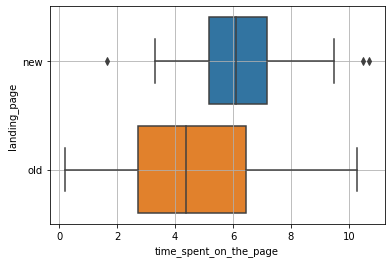

In [59]:
# visual analysis of the new landing page and time spent on the page
sns.boxplot(x="time_spent_on_the_page", y="landing_page", data = df)
plt.grid()
plt.show()

**Observations**

Users spend more time on old landing page than the new landing page



## Conducting a hypothesis test to determine whether the new landing page is more effective to gather new subcribers. Use level of significance as 5%

## Define null and alternate hypotheses

$H_0:$ The mean of users from the new landing page(treatment group) is equal to the mean of users from the old landing page(control group).

$H_a:$ The mean of users from the new landing page(treatment group) is greater than the mean of users from the old landing group(control group).

Let $\mu_1$ and $\mu_2$ be the mean of users from the new landing group and the mean of users from the old landing group respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2 $

$H_a: \mu_1 > \mu_2 $

## Selecting Appropriate test

### check whether the T-test assumptions are satisfied or not

* Continuous data - Yes, time spent on page is measured on a continuous scale.
* Equal population and unknown standard deviation - Yes, we are informed that users are divided equally into two groups.
* Independent populations - As we are taking random samples for two different groups, the control group and the treatment group .

* Random sampling from the population - Yes, we are informed that the collected sample was randomly selected.

We can use two sample T-test for this problem.

## Significance level 

As given in the problem statement, we have $\alpha$ = 0.05.

## Calculate the p-value

In [92]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df[df['landing_page']=='new']['time_spent_on_the_page'], df[df['landing_page']=='old']['time_spent_on_the_page'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


## Compare the p-value with $\alpha$

As the p-value p_value is less than the level of significance, we reject the null hypothesis.

## Insight

Since the p-value is less than the 5% significance level, we reject the null hypothesis. 
Hence, we have enough statistical evidence to say that the new landing page is more effective to gather new subscribers. 

## Do the users spend more time on the new landing page than the old landing page?

Since the p-value is less than the 5% significance level, we reject the null hypothesis. 
Hence, we have enough statistical evidence to say that users spend more time on the new landing page than the old landing page.

## Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### writing the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of users who visit the landing page and get converted in new page and old page respectively.

let the null hypothesis be;

>$H_0:p =p_0$

against the alternate hypothesis

>$H_a:p > p_0$

## Selecting Appropriate test

### checking whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, converted is either a yes or a no
*   Random sampling from the population - Yes, we are informed that collected sample is a random sample
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively. 
>$np = 100\cdot \frac{50}{100} =50 \geq 10\\
n(1-p) = 100 \cdot \frac{100-50}{100} =50 \geq 10$

### find the p-value

In [126]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(50, 100, value = 0.5, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.5


### Insight

As the p-value is much greater than the significance level 0.05, we can not reject the null hypothesis. Thus, the researcher do not have enough statistical  evidence to say that convertion rate for the new page is greater than the convertion rate for the old page at 5% significance level.

## Does the converted status depend on the preferred language?[Hint: Create a contingency table using the pandas.crosstab() function]

In [198]:
CT = pd.crosstab(index=df['converted'],columns=df['language_preferred'],margins=True)
print(CT)

language_preferred  English  French  Spanish  All
converted                                        
no                       11      19       16   46
yes                      21      15       18   54
All                      32      34       34  100


**Insights**

* A total of 11 English users had a no as converted status

* A total of 21 English users had a yes as converted status
* A total of 19 French users had a no as converted status
* A total of 15 French users had a yes as converted status
* A total of 16 Spanish users had a no as converted status
* A total of 18 Spanish users had a yes as converted status


* In summary, an overall total of 54 users had a yes as converted status, hence converted status depends on preferred language.

### Writing the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Converted status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Converted status depends on preferred language.

### Check whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


In [199]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(CT)
print('The p-value is', p_value)

The p-value is 0.7970832186581233


### Insight

As the p-value is much greater than the significance level 0.05, we can not reject the null hypothesis. Thus,we donot have enough statistical  evidence to say that converted status depends on preferred language at 5% significance level.

## Is the mean time spent on the new page same for the different language users?

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of mean time spent  for different language users English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language mean time is different from the rest.


language_preferred
English    5.559063
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


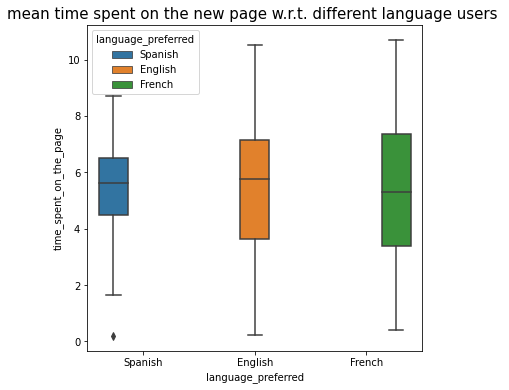

In [204]:
# mean time spent on new page by different language users
print(df.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df, hue = 'language_preferred')
a.set_title("mean time spent on the new page w.r.t. different language users ", fontsize=15)
plt.show()

**observations**

The mean time spent on the page with respect to language users is different

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ time spent follows a normal distribution against

against the alternative hypothesis

>$H_a:$  time spent does not follow a normal distribution

In [216]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [219]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['language_preferred']=="English"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="French"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### find the p-value

In [221]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


### Insight
As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence, we donot have enough statistical significance to conclude that the mean time spent on the new page is the same for different language users at 5% significance level.

However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests are used to test the differences between all pairs of means.

### Multiple Comparison test (Tukey HSD)


In order to identify which language user mean time is different, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [222]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df['time_spent_on_the_page'], groups = df['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.3058 0.8482 -1.7123 1.1006  False
English Spanish  -0.2273    0.9 -1.6338 1.1792  False
 French Spanish   0.0785    0.9 -1.3065 1.4635  False
-----------------------------------------------------


### Insight

As the p-values (refer to the p-adj column) for comparing the mean time spent by different language users on new page is greater than the significance level, the null hypothesis of equality of all language users mean time cannot be rejected.

Thus, we can say that the mean time for different language users; Englsh, French and Spanish is significantly different.


## Pandas Profiling

In [7]:
import sys
!{sys.executable} -m pip install pandas-profiling


In [8]:
#import pandas_profiling
import pandas_profiling

In [9]:
df = pd.read_csv('abtest.csv')

In [10]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
pandas_profiling.ProfileReport(df).to_file("output.html")

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]